In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

### Exploratory Analysis

In [143]:
data = pd.read_csv("C:/Users/riyak/Downloads/heart_statlog_cleveland_hungary_final.csv")
data.head(6)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0


Text(0.5, 1.0, 'Cholesterol Distribution')

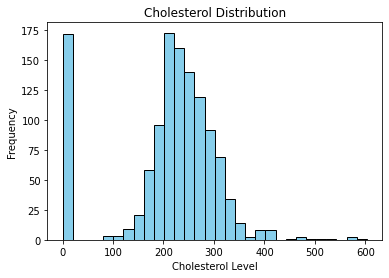

In [144]:
plt.hist(data['cholesterol'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Cholesterol Level")
plt.ylabel("Frequency")
plt.title("Cholesterol Distribution")

In [130]:
def abline(slope, intercept, color = 'r', label = None):
    ax = plt.gca()
    x = np.array(ax.get_xlim())
    y = intercept + slope * x
    ax.plot(x, y, color = color, label = label)

From the graph above, we see that there are a lot of values where cholesterol is equal to 0, which could be potential outliers. Moving forward, lets remove these outliers and build a linear regression model off of that. 

In [145]:
data = data[data['cholesterol'] != 0]
data = data[data['cholesterol'] <= 550]

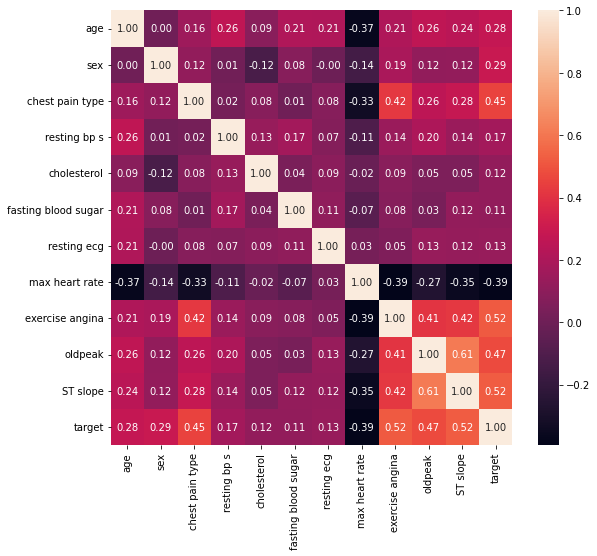

In [146]:
#Heatmap
plt.figure(figsize=(9,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f")
plt.show()

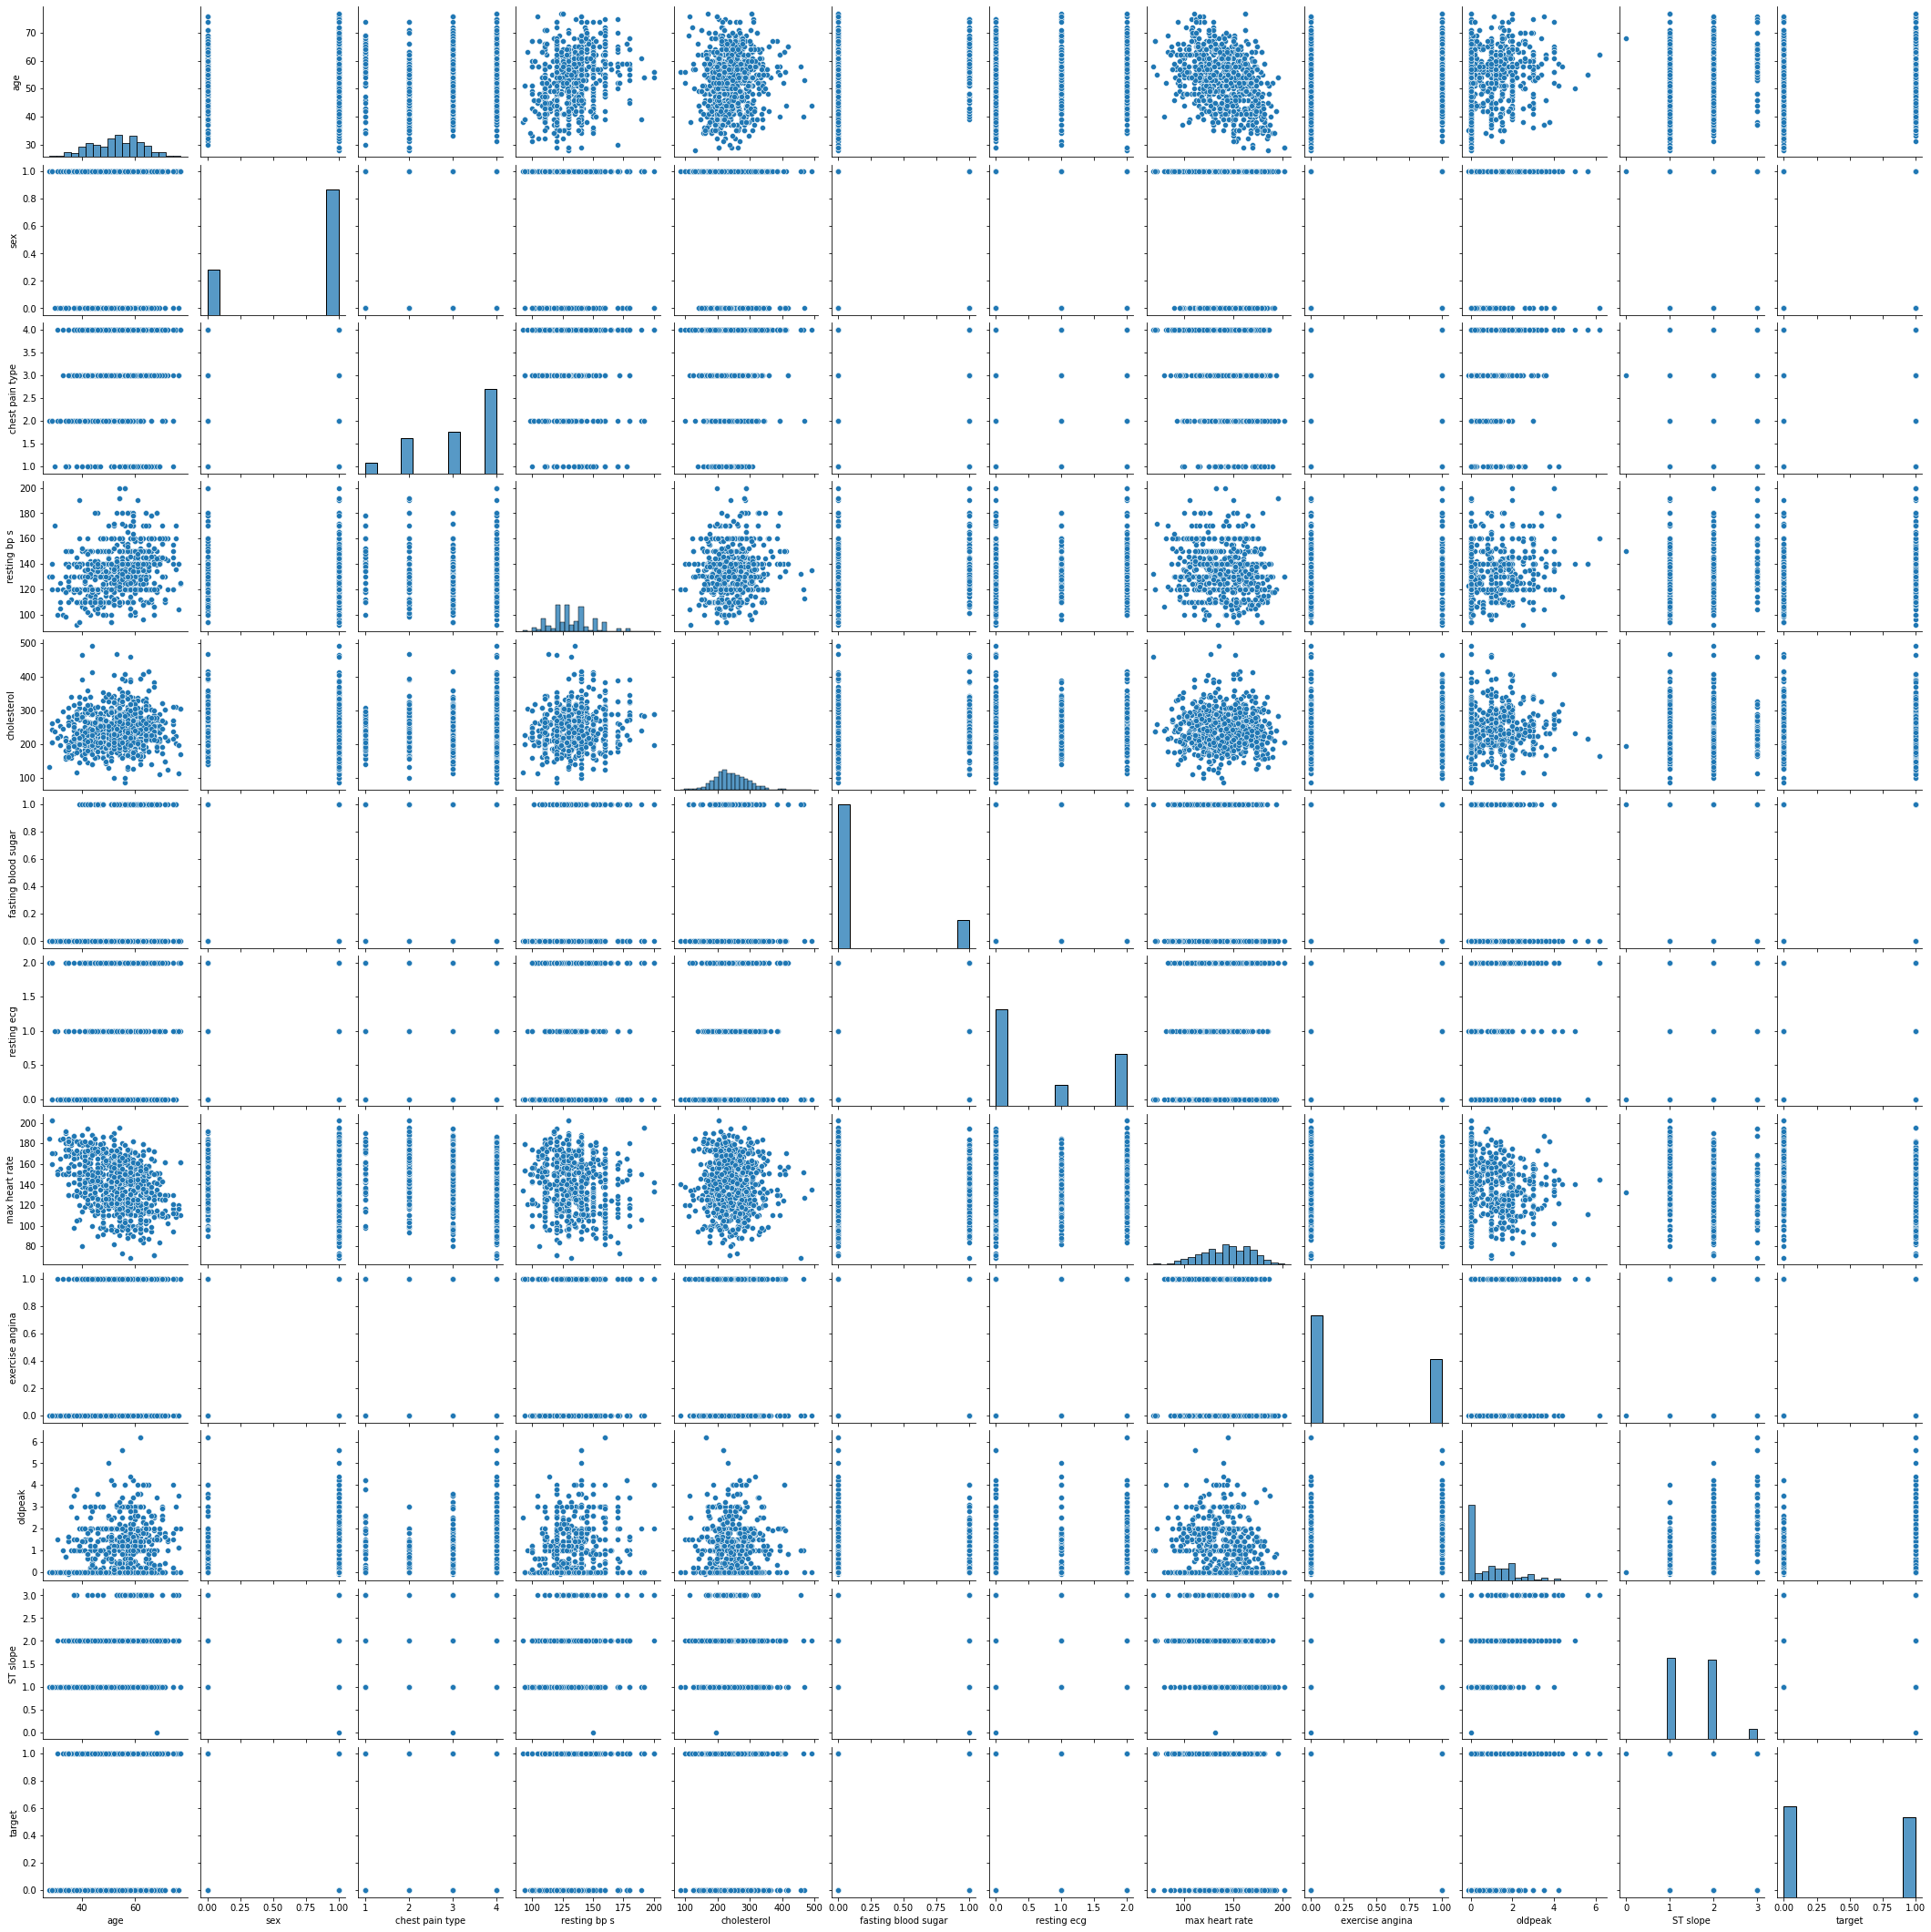

In [119]:
#Pairplot
pairplot = sns.pairplot(data)
plt.show()

### Predicting Cholesterol Using Linear Regression:

In [156]:
X = data.drop(['chest pain type', 'cholesterol', 'resting ecg', 'exercise angina', 'oldpeak', 'ST slope', 'target'], axis = 1)
y = data['cholesterol']

In [161]:
sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
                                k_features=2,
                                forward=True,
                                scoring='neg_mean_squared_error',
                                cv=None)

selected_features = sfs.fit(X, y)
selected_features.k_feature_names_

('sex', 'resting bp s')

In [162]:
data_selected = data.loc[:, ['sex', 'resting bp s']]
# Split the data into train and test sets
X_train, X_test,\
    y_train, y_test = train_test_split(
        data_selected, y,
        test_size=0.3,
        random_state=42)

In [163]:
# Fit a linear regression model using selected features
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)
predictions = linreg.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
 

C:\Users\riyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [164]:
print('The r2 is: ', r2)
print('The rmse is: ', rmse)
# Printing coefficients and intercept
print(linreg.coef_)
print(linreg.intercept_)

The r2 is:  0.019070770005977344
The rmse is:  56.96236338421148
[-13.66137685   0.48588103]
191.35066758641685


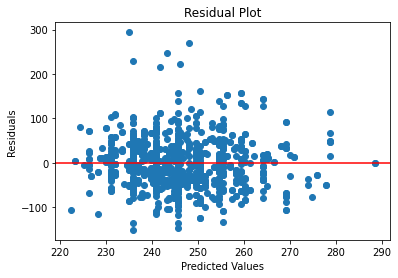

In [165]:
#plotting residuals
y_pred = linreg.predict(data_selected)
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-') # add horizontal line at y=0
plt.show()

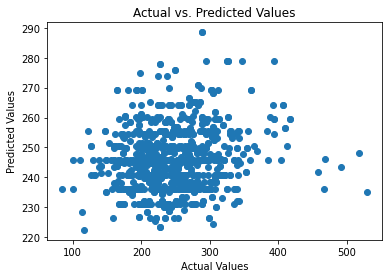

In [166]:
#Actual vs. Predicted Plot
plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

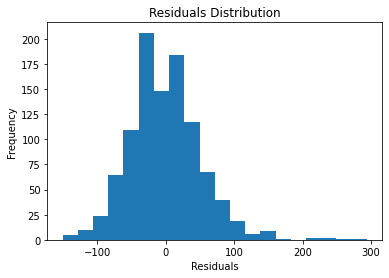

In [167]:
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

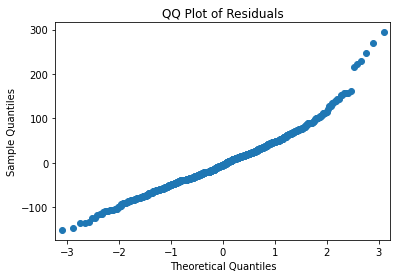

In [168]:
sm.qqplot(residuals)
plt.title("QQ Plot of Residuals")
plt.show()